## Recurrent neural networks with pure numpy

The place to start seems to be [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). I'm also following the excellent Keras book p197 on RNNs.

## Setup code

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
def plot_history(history, yrange=(0.0, 5.00), figsize=(3.5,3)):
    plt.figure(figsize=figsize)
    plt.ylabel("Sentiment log loss")
    plt.xlabel("Epochs")
    loss = history[:,0]
    valid_loss = history[:,1]
    plt.plot(loss, label='train_loss')
    plt.plot(valid_loss, label='val_loss')
    # plt.xlim(0, 200)
    plt.ylim(*yrange)
    plt.legend(loc='lower right')
    plt.show()

## Toy RNN with simple signal

Let's build an RNN for a known and obvious signal like a sine wave so we don't have to worry about text at first. Predict ith value of signal from previous k values.

### Create some fake data

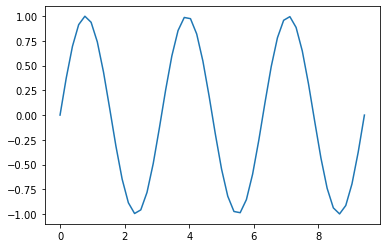

In [3]:
timesteps = 50

x = np.linspace(0,3*np.pi,timesteps)
siny = np.sin(2*x)
plt.plot(x,siny)

Now take slide window to get training data. ith value is predicted from previous k values

In [4]:
k = 4
X = []
y = []
for i in range(k,len(siny)):
    X.append(siny[i-k:i])
    y.append(siny[i])
X = np.array(X)
y = np.array(y).reshape(-1,1)
X.shape, y.shape

((46, 4), (46, 1))

## Training a simple RNN model

I read [gist from karpathy](https://gist.github.com/karpathy/d4dee566867f8291f086) in addition to Karpathy's blog post. Using his notation, there are W_hh, W_xh, W_hy that transform the hidden state h to the next hidden state, transform's the input variable to next hidden state, and transform the hidden state to output. This [blog](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html#Creating-the-Network) was also useful but most useful was [fastai deep dive chapter](https://github.com/fastai/fastbook/blob/master/12_nlp_dive.ipynb).

Note: You can put the loop inside the model or in the training process.  In either case, we need to turn the crank $p$ times for $p$ features in a specific input vector. $p$ can vary, such as we see with documents of different lengths.

Ok, this doesn't train anything but shows how to get dimensions right.

In [30]:
input_features=4
output_features=1
hidden_size=10

W_xh  = np.random.randn(hidden_size, 1) * 0.01 
W_hh  = np.random.randn(hidden_size, hidden_size) * 0.01
W_hy  = np.random.randn(output_features, hidden_size) * 0.01

def relu(x): return x * (x > 0)

print("x", X.shape)
batch_size = X.shape[0]
nfeatures = X.shape[1]
h = 0 # placeholder: it's actually going to have shape len(x) by hidden_size
for i in range(nfeatures): # for all input_features
    xi = X[:,i].reshape(1,-1)
    print("xi", xi.shape)
    print("W_xh", W_xh.shape)
    h += W_xh.dot(xi)
    print("h", h.shape)
    foo = W_hh.dot(h)
    print("foo", foo.shape)
    h = relu(foo)
    print("relu", h.shape)
o = W_hy.dot(h)
y_pred = o.reshape(-1)
o.shape

x (46, 4)
xi (1, 46)
W_xh (10, 1)
h (10, 46)
foo (10, 46)
relu (10, 46)
xi (1, 46)
W_xh (10, 1)
h (10, 46)
foo (10, 46)
relu (10, 46)
xi (1, 46)
W_xh (10, 1)
h (10, 46)
foo (10, 46)
relu (10, 46)
xi (1, 46)
W_xh (10, 1)
h (10, 46)
foo (10, 46)
relu (10, 46)


(1, 46)

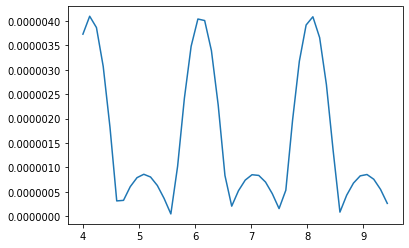

In [31]:
plt.plot(np.linspace(k,3*np.pi,timesteps-k), y_pred)
plt.show()